In [1]:
# Importing the Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings; warnings.simplefilter('ignore')

In [2]:
# Importing the dataset

df_forest = pd.read_csv("/kaggle/input/forest-fire-area/forestfires.csv")
df_forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# Shape of the dataset
print ("The shape of the dataset : ", df_forest.shape)

The shape of the dataset :  (517, 13)


## Exploratory Data Analysis

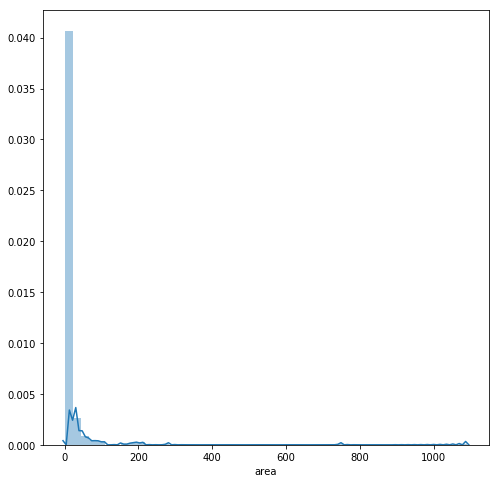

In [4]:
# Skewness of the Area in the dataset
plt.rcParams['figure.figsize'] = [8, 8]
sns.distplot(df_forest['area']);

In [5]:
# Reducing the Right Skewness of the Area using log(n) + 1
df_forest['u_area'] = np.log(df_forest['area'] + 1)

#### Month Vs Temperature Barplot

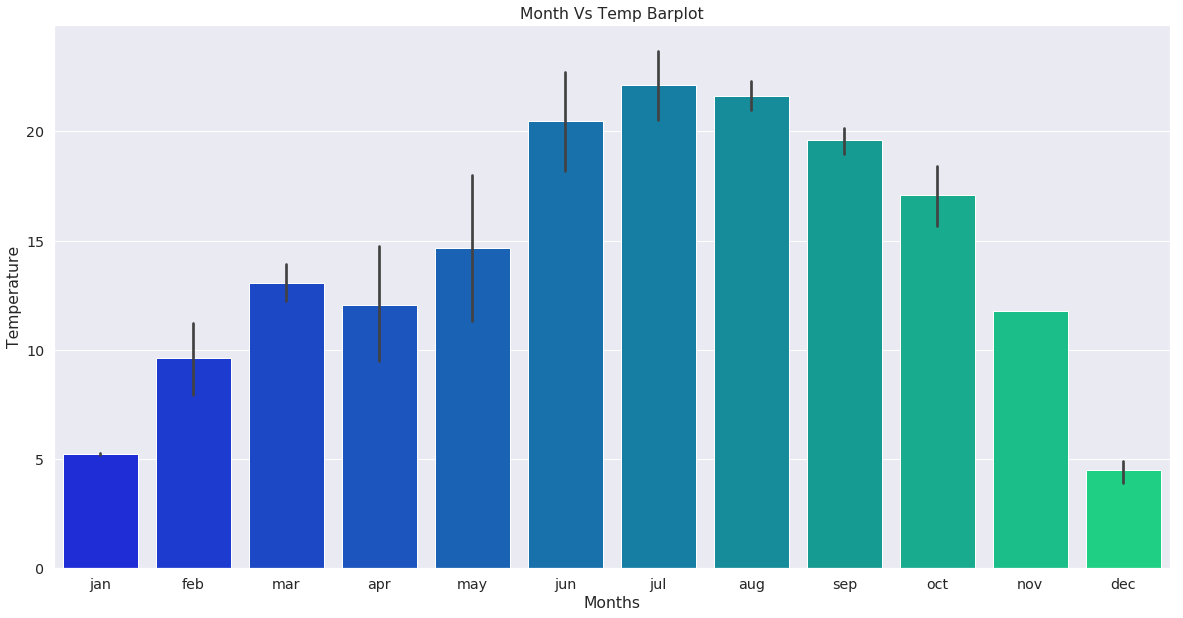

In [6]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = df_forest,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

#### Countplot for the days in the week

In [7]:
df_forest.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

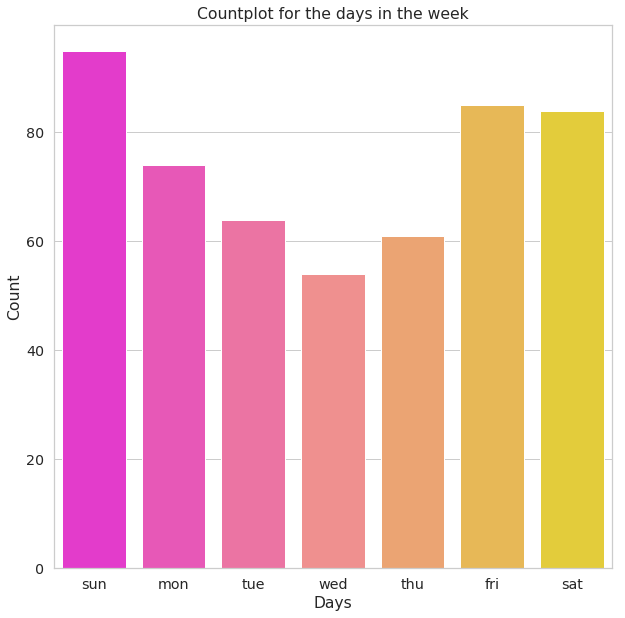

In [8]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(df_forest['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the days in the week', xlabel = 'Days', ylabel = 'Count');

#### Scatter Plot between Area and Temperature

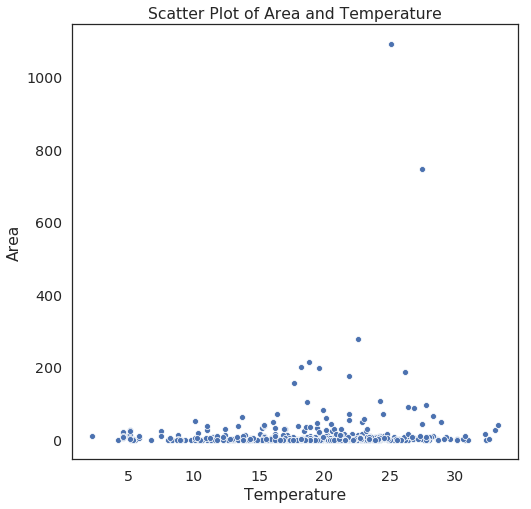

In [9]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(df_forest['temp'], df_forest['area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");

#### Scatter Plot between unskewed Area and Temperature

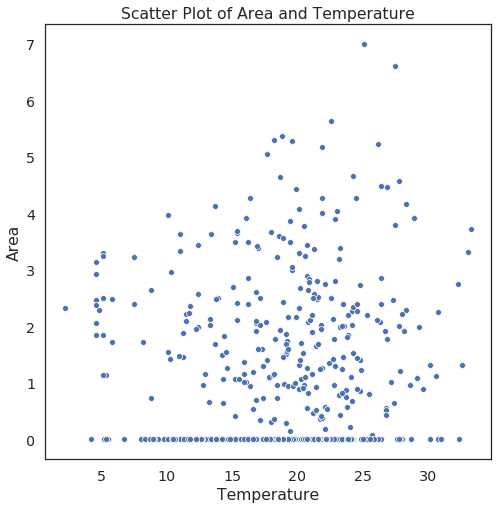

In [10]:
# After Reducing the Skewness
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(df_forest['temp'], df_forest['u_area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");

#### Skewed and Unskewed Area Distribution

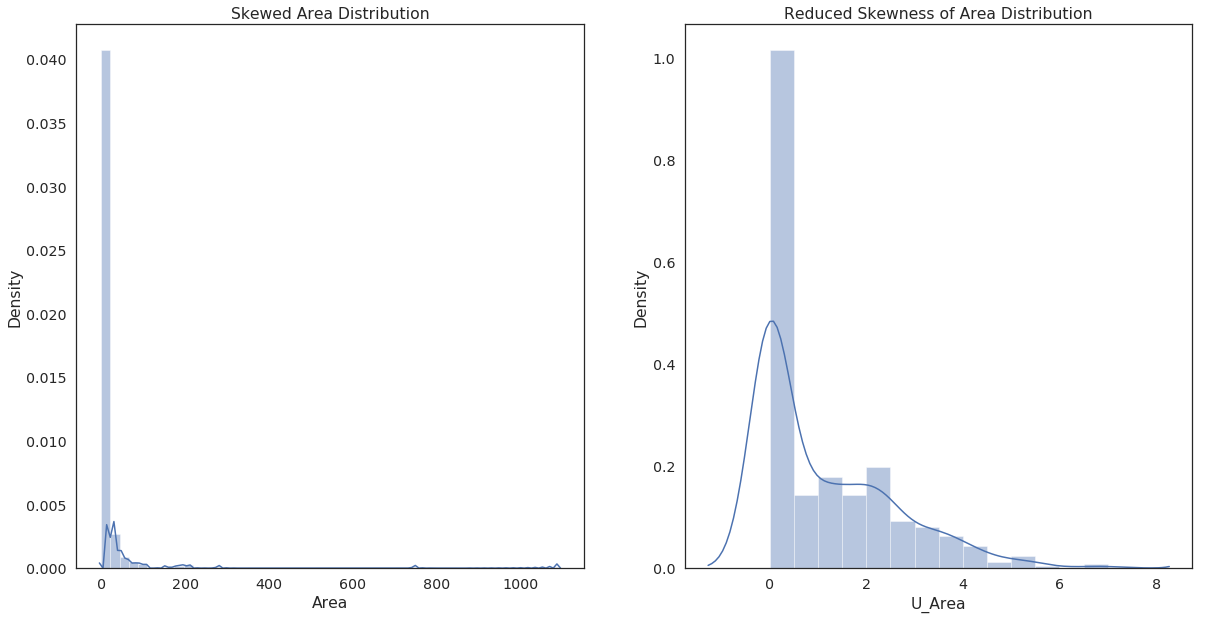

In [11]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = 'white', font_scale = 1.3)
fig, ax = plt.subplots(1,2)

# Distribution Plots
area_dist = sns.distplot(df_forest['area'], ax = ax[0]);
area_dist_2 = sns.distplot(df_forest['u_area'], ax = ax[1]);
area_dist.set(title = "Skewed Area Distribution", xlabel = "Area", ylabel = "Density")
area_dist_2.set(title = "Reduced Skewness of Area Distribution", xlabel = "U_Area", ylabel = "Density");

#### Correlation Heatmap

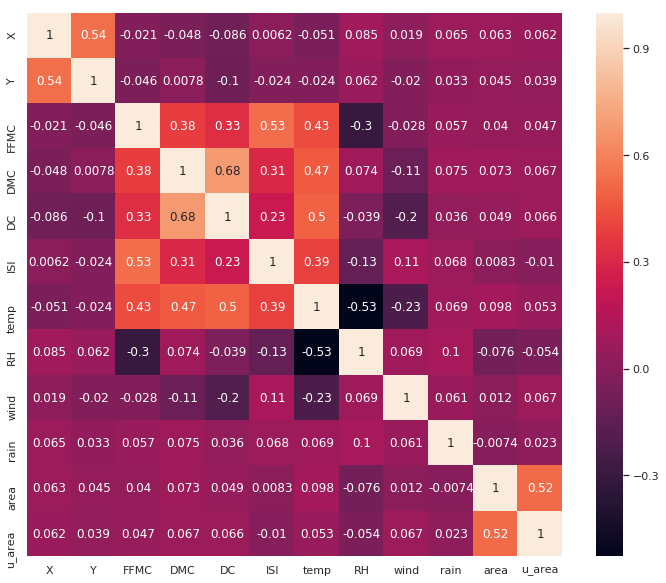

In [12]:
# Correlation Heatmap of the features in the dataset
plt.rcParams['figure.figsize'] = [12, 10]
sns.set(font_scale = 1)
sns.heatmap(df_forest.corr(), annot = True);

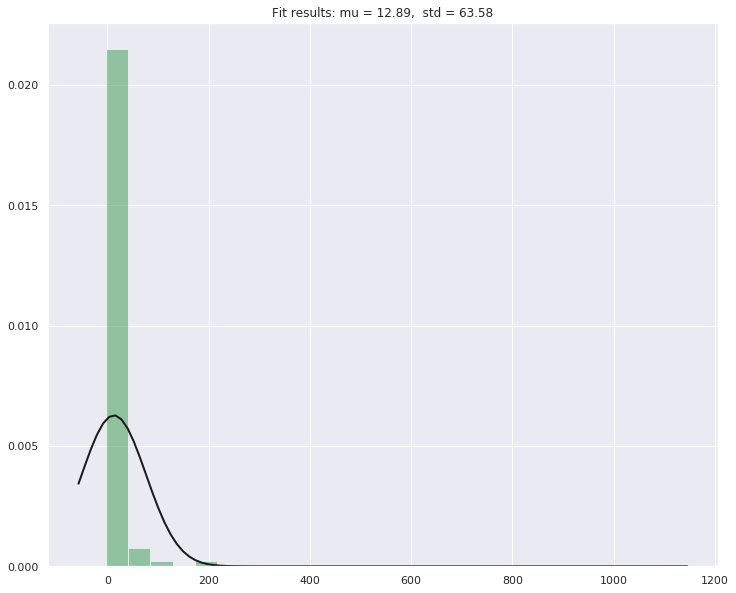

In [13]:
data = norm.rvs(df_forest['area'])

# Fit a normal distribution to the data
mu, std = norm.fit(data)

plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## Preprocessing

In [14]:
# Reducing the skewness for the final training and dropping u_area
df_forest['area'] = np.log(df_forest['area'] + 1)
df_forest.drop(columns = 'u_area', inplace = True)

df_forest.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [15]:
df_forest['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [16]:
df_forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,1.111026
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,1.398436
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.418710
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,2.024193
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,6.995620


In [17]:
# Changing categorical values into numerical values

# Months
df_forest['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
                           'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12},
                           inplace = True)

# Days
df_forest['day'].replace({'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}, inplace = True)

# # Using Label Encoder for cat to num conversion
# categorical = list(df_forest.select_dtypes(include = ["object"]).columns)
# for i, column in enumerate(categorical) :
#     label = LabelEncoder()
#     df_forest[column] = label.fit_transform(df_forest[column])

df_forest.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


#### Splitting the dataset into training and testing

In [18]:
target = df_forest['area']
features = df_forest.drop(columns = 'area')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.15, random_state = 196)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (439, 12)
Test data set size :  (78, 12)


In [19]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
344,6,3,9,2,91.5,130.1,807.1,7.5,12.2,66,4.9,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0
485,2,4,8,2,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0
419,2,5,8,1,91.6,181.3,613.0,7.6,24.8,36,4.0,0.0
263,6,3,8,6,91.1,141.1,629.1,7.1,19.3,39,3.6,0.0


## Machine Learning Models

#### Linear Regression

In [20]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions))
print ("r2 Score : ", r2_score(y_test, predictions))

Mean Squared Error :  1.6721913684845606
r2 Score :  -0.002195214621955266


#### Polynomial Regression

In [21]:
# Transforming data
poly = PolynomialFeatures(4)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

model_2 = LinearRegression()
model_2.fit(poly_X_train, y_train)

# Predictions
predictions_poly = model_2.predict(poly_X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions_poly))
print ("r2 Score : ", r2_score(y_test, predictions_poly))

Mean Squared Error :  5383.667604793115
r2 Score :  -3225.595958050312


#### Lasso Regression

In [22]:
# Lasso regression
model_3 = Lasso(alpha = 100, max_iter = 10000) 
model_3.fit(X_train, y_train)

# Predictions
prediction = model_3.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))
print ("r2 Score : ", r2_score(y_test, prediction))

Mean Squared Error :  1.6692539081387816
r2 Score :  -0.0004347051747921604


#### Ridge Regression

In [23]:
# Ridge Regression
model_4 = Ridge(alpha = 500)
model_4.fit(X_train, y_train)

# Predictions
pred = model_4.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, pred))
print ("r2 Score : ", r2_score(y_test, pred))

Mean Squared Error :  1.688697700921848
r2 Score :  -0.012087962360870064


#### ElasticNet

In [24]:
# ElasticNet
model_5 = ElasticNet(alpha = 100, max_iter = 10000)
model_5.fit(X_train, y_train)

# Predictions
pred1 = model_5.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, pred1))
print ("r2 Score : ", r2_score(y_test, pred1))

Mean Squared Error :  1.6692539081387816
r2 Score :  -0.0004347051747921604


#### SVR

In [25]:
# SVR
model_6 = SVR(C = 100, kernel = 'linear')
model_6.fit(X_train, y_train)

# Predictions
prediction = model_6.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))
print ("r2 Score : ", r2_score(y_test, prediction))

Mean Squared Error :  18.010953593262286
r2 Score :  -9.794513021738656


In [26]:
prediction = np.exp(prediction - 1)
prediction

array([1.82494055e+02, 1.96263274e+02, 6.60906792e+01, 4.86740186e-01,
       1.47589648e+00, 1.51297826e-01, 1.65627608e-01, 1.52172038e-01,
       1.62944015e+00, 3.57958754e-02, 2.10552076e-02, 1.43499486e-01,
       1.40356384e+01, 4.28436529e-01, 2.67512289e-01, 3.12752136e-03,
       2.30045083e-02, 1.17076565e-01, 1.06519628e-02, 1.58480258e-04,
       3.52906430e-03, 1.15223599e+00, 6.25412023e+00, 8.27454125e-01,
       1.46057293e-01, 1.76930836e+00, 4.17140888e-01, 9.85649972e-03,
       3.64416119e+00, 4.12254412e-01, 5.10914563e-04, 3.55692561e+01,
       1.27865937e-02, 8.55260638e-02, 5.89741389e-01, 1.88392661e+00,
       1.56486111e-03, 1.19931587e-01, 1.76869090e-06, 8.53654954e-02,
       2.62911593e-01, 2.98787244e-02, 2.84313009e-04, 2.88527128e+00,
       1.87424573e-01, 1.32797568e-01, 3.40113211e-01, 2.66040602e-03,
       3.96807019e-02, 6.50117522e-01, 1.93844898e+00, 3.99004428e-03,
       1.32373411e-01, 4.63573465e-01, 4.68920381e-02, 8.72916914e+00,
      